## Name: Prathamesh .P. Naukarkar

## Task:EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [2]:
#import libraries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [3]:
# library for train test split
from sklearn.model_selection import train_test_split

In [4]:
# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional
     

In [6]:

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
url = 'https://raw.githubusercontent.com/ShresthaSudip/SMS_Spam_Detection_DNN_LSTM_BiLSTM/master/SMSSpamCollection'
messages = pd.read_csv(url, sep ='\t',names=["label", "message"])
messages.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [18]:
duplicatedRow = messages[messages.duplicated()]
duplicatedRow.head()

,label,message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls


In [19]:
messages.groupby('label').describe().T
     

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [20]:
# Get all the ham and spam emails
ham_msg = messages[messages.label =='ham']
spam_msg = messages[messages.label=='spam']

In [21]:

# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.message.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.message.to_numpy().tolist())

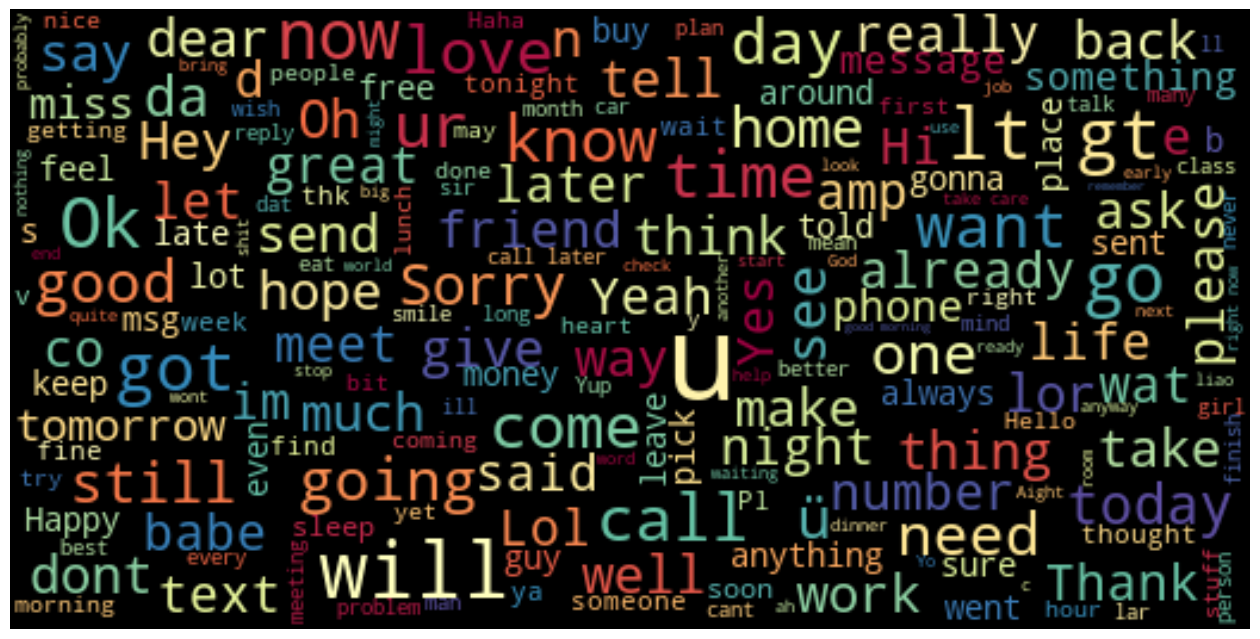

In [26]:
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='Spectral_r').generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

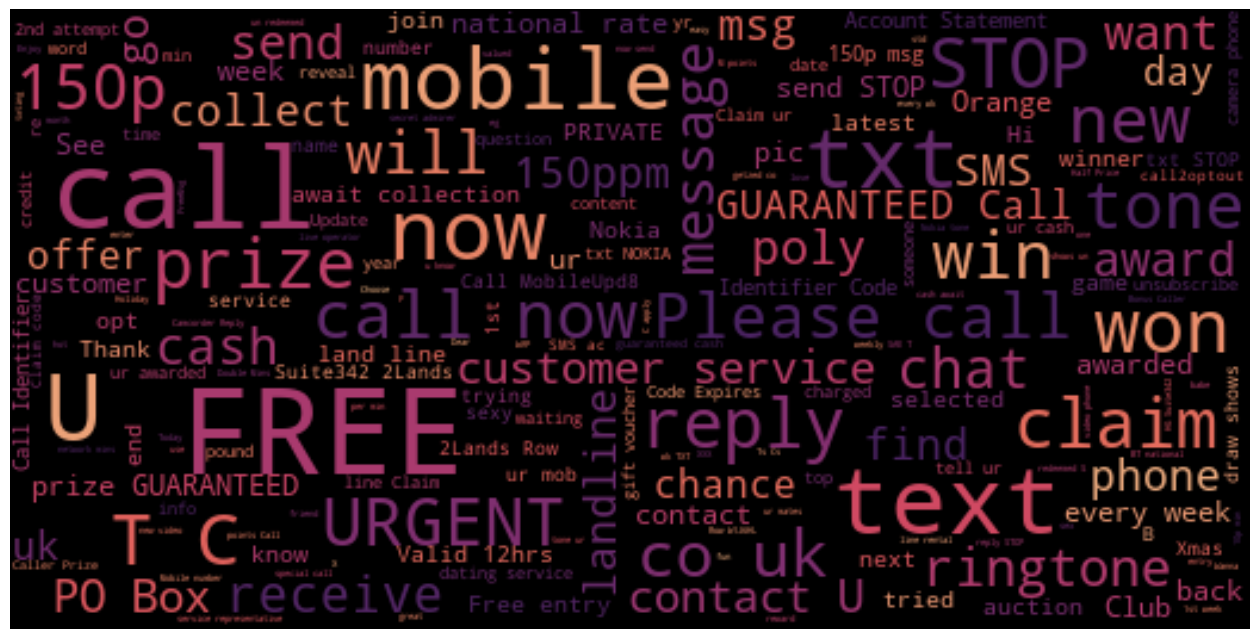

In [29]:
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black", colormap='flare_r').generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()


15.481865284974095

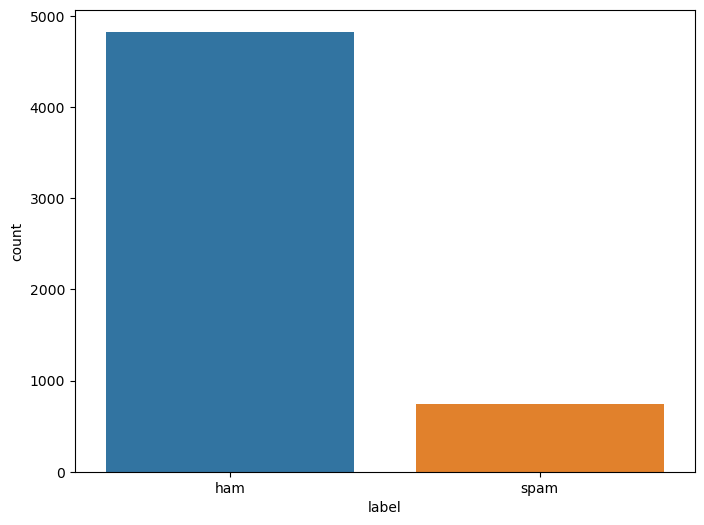

In [30]:

plt.figure(figsize=(8,6))
sns.countplot(messages.label)
# Percentage of spam messages
(len(spam_msg)/len(ham_msg))*100 # 15.48%

In [31]:
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44)
spam_msg_df = spam_msg
print(ham_msg_df.shape, spam_msg_df.shape)
     

(747, 2) (747, 2)


Text(0.5, 0, 'Message types')

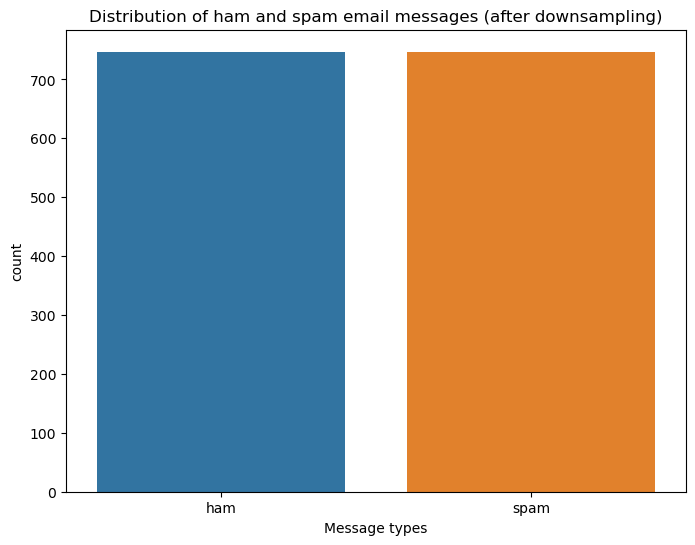

In [32]:
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(msg_df.label)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')

In [33]:

# Get length column for each text
msg_df['text_length'] = msg_df['message'].apply(len)

#Calculate average length by label types
labels = msg_df.groupby('label').mean()
labels
     


,text_length
label,
ham,73.238286
spam,138.670683


In [34]:
# Map ham label as 0 and spam as 1
msg_df['msg_type']= msg_df['label'].map({'ham': 0, 'spam': 1})
msg_label = msg_df['msg_type'].values

# Split data into train and test
train_msg, test_msg, train_labels, test_labels = train_test_split(msg_df['message'], msg_label, test_size=0.2, random_state=434)

In [35]:
# Hyper-parameters for tokenization
max_len = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "" 
vocab_size = 500

In [36]:

# Using the Tokenizer() to tokenize the words
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)

In [37]:
# Get the word_index 
word_index = tokenizer.word_index
word_index

{'': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'u': 8,
 'your': 9,
 'for': 10,
 'is': 11,
 '2': 12,
 'and': 13,
 'now': 14,
 'free': 15,
 'or': 16,
 'on': 17,
 'in': 18,
 'ur': 19,
 'have': 20,
 '4': 21,
 'txt': 22,
 'of': 23,
 'are': 24,
 'with': 25,
 'me': 26,
 'from': 27,
 'text': 28,
 'get': 29,
 'my': 30,
 'it': 31,
 'stop': 32,
 'just': 33,
 'mobile': 34,
 'this': 35,
 'will': 36,
 'be': 37,
 'no': 38,
 'that': 39,
 'claim': 40,
 'reply': 41,
 'can': 42,
 'so': 43,
 'send': 44,
 'www': 45,
 'we': 46,
 'only': 47,
 'our': 48,
 'not': 49,
 'out': 50,
 'at': 51,
 'do': 52,
 'if': 53,
 'prize': 54,
 'new': 55,
 'go': 56,
 'cash': 57,
 'but': 58,
 '150p': 59,
 'uk': 60,
 '1': 61,
 'nokia': 62,
 'who': 63,
 't': 64,
 'all': 65,
 'win': 66,
 'please': 67,
 'won': 68,
 'up': 69,
 'tone': 70,
 'when': 71,
 "i'm": 72,
 'week': 73,
 'been': 74,
 'what': 75,
 'msg': 76,
 '50': 77,
 'com': 78,
 'urgent': 79,
 'how': 80,
 'service': 81,
 'phone': 82,
 'time': 83,
 'cont

In [38]:

# Checking the number of unique tokens
tot_tokens = len(word_index)
print('No. of unique token ==> ', tot_tokens)

No. of unique token ==>  4169


In [39]:
# Sequencing and padding on training and testing 
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )

testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,padding = padding_type, truncating = trunc_type)
     

In [40]:
# Shape of train tensor
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (1195, 50)
Shape of testing tensor:  (299, 50)


In [41]:
# Hyper Parameters
vocab_size = 500
embeding_dim = 16
drop_value = 0.2
n_dense = 24
     


In [42]:
# Model Architecture for dense network
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))

In [43]:

model.summary()
     

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
______________________________________________________

In [44]:
# Compiling the dense model
model.compile(loss = 'binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])

In [67]:
# Training the dense model
num_epochs = 30
early_stop = EarlyStopping(monitor = 'val_loss', patience = 3)

history = model.fit(training_padded, train_labels,
                    epochs = num_epochs, validation_data = (testing_padded, test_labels),
                    callbacks = [early_stop], verbose = 2)

Epoch 1/30
38/38 - 0s - loss: 0.0677 - accuracy: 0.9808 - val_loss: 0.1250 - val_accuracy: 0.9365 - 278ms/epoch - 7ms/step
Epoch 2/30
38/38 - 0s - loss: 0.0670 - accuracy: 0.9791 - val_loss: 0.1160 - val_accuracy: 0.9431 - 223ms/epoch - 6ms/step
Epoch 3/30
38/38 - 0s - loss: 0.0621 - accuracy: 0.9799 - val_loss: 0.1036 - val_accuracy: 0.9565 - 212ms/epoch - 6ms/step
Epoch 4/30
38/38 - 0s - loss: 0.0626 - accuracy: 0.9816 - val_loss: 0.1140 - val_accuracy: 0.9465 - 249ms/epoch - 7ms/step
Epoch 5/30
38/38 - 0s - loss: 0.0608 - accuracy: 0.9824 - val_loss: 0.1244 - val_accuracy: 0.9465 - 225ms/epoch - 6ms/step
Epoch 6/30
38/38 - 0s - loss: 0.0593 - accuracy: 0.9824 - val_loss: 0.1197 - val_accuracy: 0.9465 - 204ms/epoch - 5ms/step


In [46]:
# Model performance on test data 
model.evaluate(testing_padded, test_labels)

10/10 [==============================] - 0s 4ms/step - loss: 0.1084 - accuracy: 0.9599


[0.10841412842273712, 0.9598662257194519]

In [47]:
# Read the metrics as a dataframe 
metrics = pd.DataFrame(history.history)
# Rename column for plotting
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)

def plot_graphs1(var1, var2, string):
  """
  plots the graph of var1, var2 vs number of epochs 
  """
  metrics[[var1, var2]].plot()
  plt.title('Training and Validation ' + string)
  plt.xlabel ('Number of epochs')
  plt.ylabel(string)
  plt.legend([var1, var2])


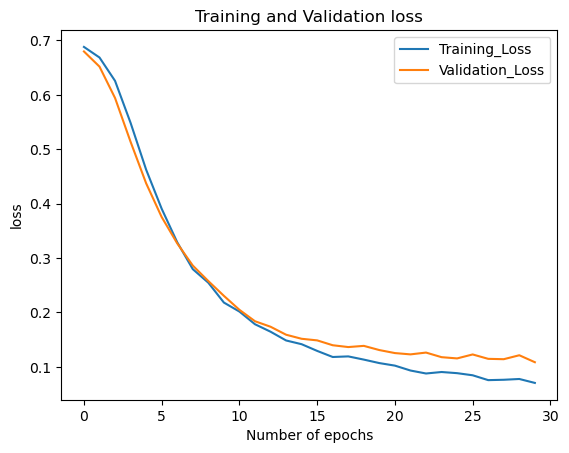

In [48]:
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
     

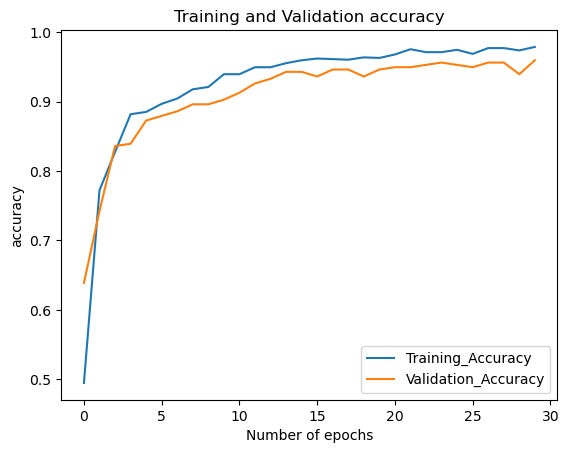

In [49]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [50]:

# LSTM hyperparameters
n_lstm = 20
drop_lstm = 0.2

In [51]:
# LSTM Spam detection architecture
model1 = Sequential()
model1.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True))
model1.add(Dense(1, activation='sigmoid'))
     


In [52]:
# Compiling the LSTM Model
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [69]:
# Create a dataframe of metrics
metrics = pd.DataFrame(history.history)
# Rename columns for plotting
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)

def plot_graphs1(var1, var2, string):
    """
    plots the graph of var1, var2 vs number of epochs 
    """
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

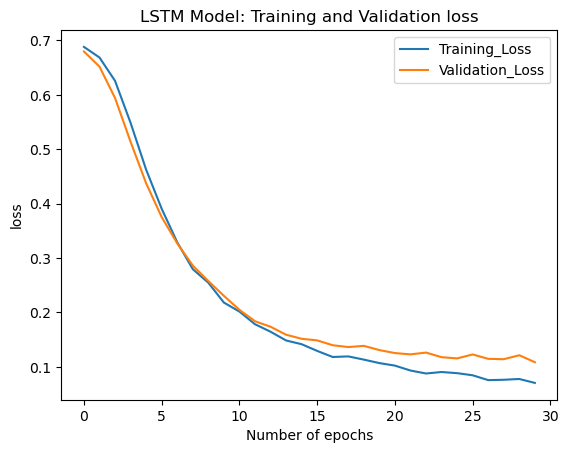

In [56]:

plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')

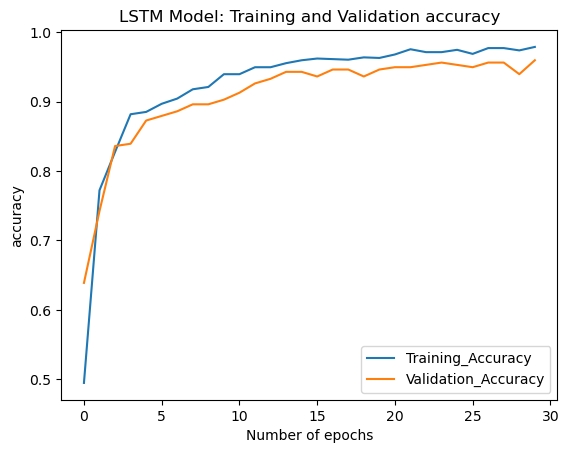

In [57]:
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [58]:
# Biderectional LSTM Spam detection architecture
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm, return_sequences=True)))
model2.add(Dense(1, activation='sigmoid'))
     

In [59]:

# Compiling the Bi-LSTM Model
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

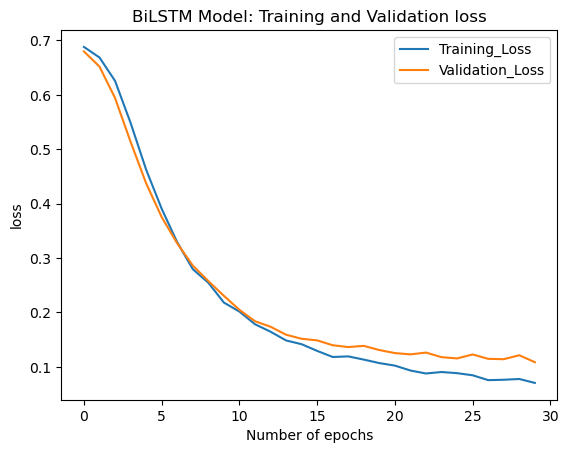

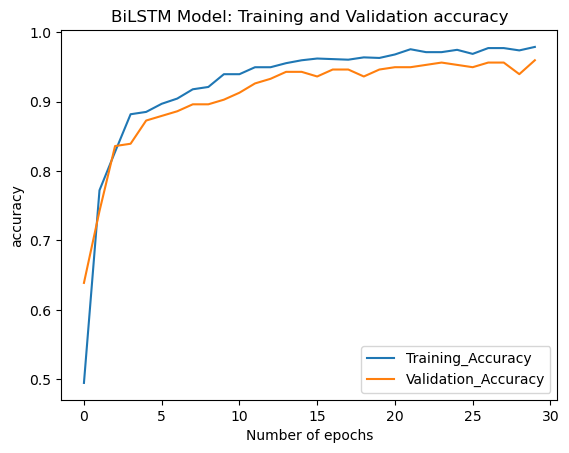

In [61]:
# Create a dataframe
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    """
    plots the graph of var1, var2 vs number of epochs 
    """
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])

# Plots
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

In [68]:

print(f"Dense architecture loss and accuracy: {model.evaluate(testing_padded, test_labels)} " )


10/10 [==============================] - 0s 4ms/step - loss: 0.1197 - accuracy: 0.9465
Dense architecture loss and accuracy: [0.11972440034151077, 0.9464883208274841] 
